## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


## LOAD AND PREPARE DATASET

In [2]:
cohort = pd.read_csv('Dataset_ecommerce.csv')

cohort.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [3]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
cohort.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


In [5]:
cohort.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [6]:
cohort.dropna(inplace=True)

In [7]:
cohort['InvoiceDate'] = pd.to_datetime(cohort['InvoiceDate'])

In [8]:
# EXPLORATORY DATA ANALYSIS

**ANALYSIS OF COUNTRIES AND TOTAL NUMBER OF PURCHASES**

In [9]:
quantity_by_country = cohort.groupby(['Country'])['Quantity'].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values('Quantity', ascending = False).reset_index()
quantity_by_country.head()

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206


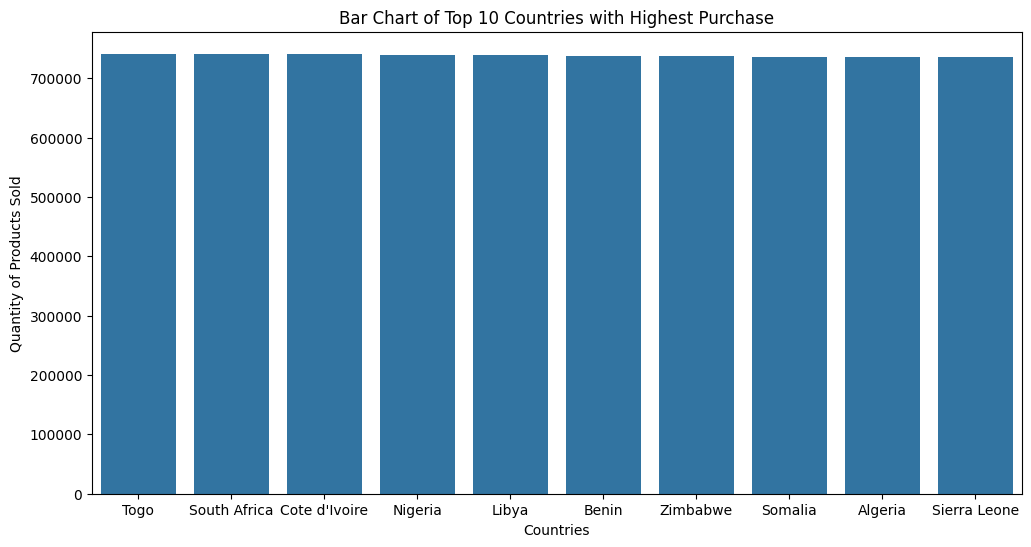

In [10]:
top10_countries = quantity_by_country.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Country', y='Quantity', data=top10_countries)

plt.xlabel('Countries')
plt.ylabel('Quantity of Products Sold')
plt.title ('Bar Chart of Top 10 Countries with Highest Purchase')
plt.show()


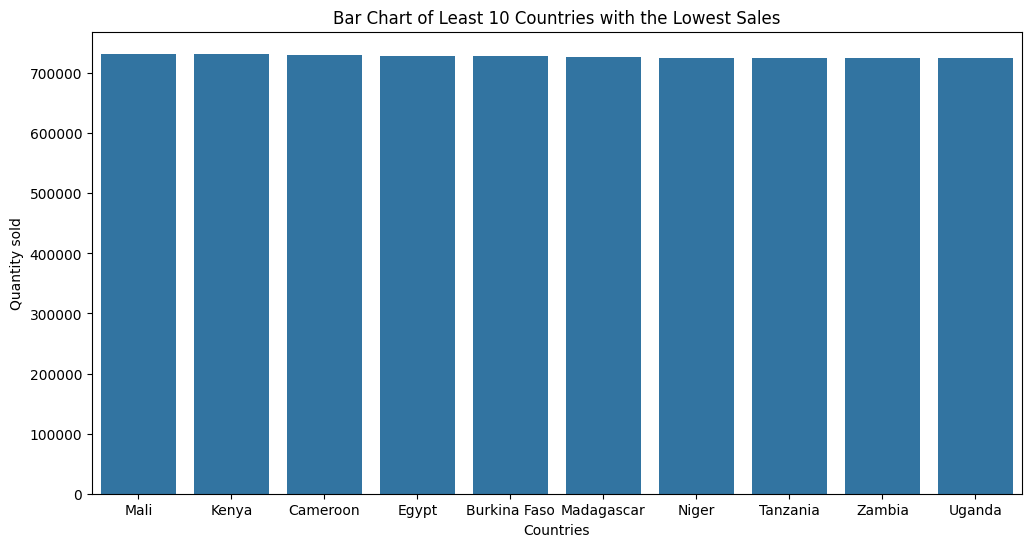

In [11]:
least10_countries = quantity_by_country.tail(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Country', y='Quantity', data=least10_countries)

plt.title('Bar Chart of Least 10 Countries with the Lowest Sales')
plt.xlabel('Countries')
plt.ylabel('Quantity sold')
plt.show()

**ANALYSIS OF COUNTRIES AND TOTAL NUMBER OF CUSTOMERS**

In [12]:
country_to_customers = cohort.groupby(["Country"])["CustomerID"].nunique().reset_index()
country_to_customers = country_to_customers.sort_values("CustomerID", ascending = False).reset_index()
country_to_customers.rename(columns = {"CustomerID" : "Number of customers"}, inplace = True)

In [13]:
country_to_customers.head()

,index,Country,Number of customers
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051
4,2,Burkina Faso,3049


**Draw a plot of top 10 countries with highest number of customers (unique customerID)**

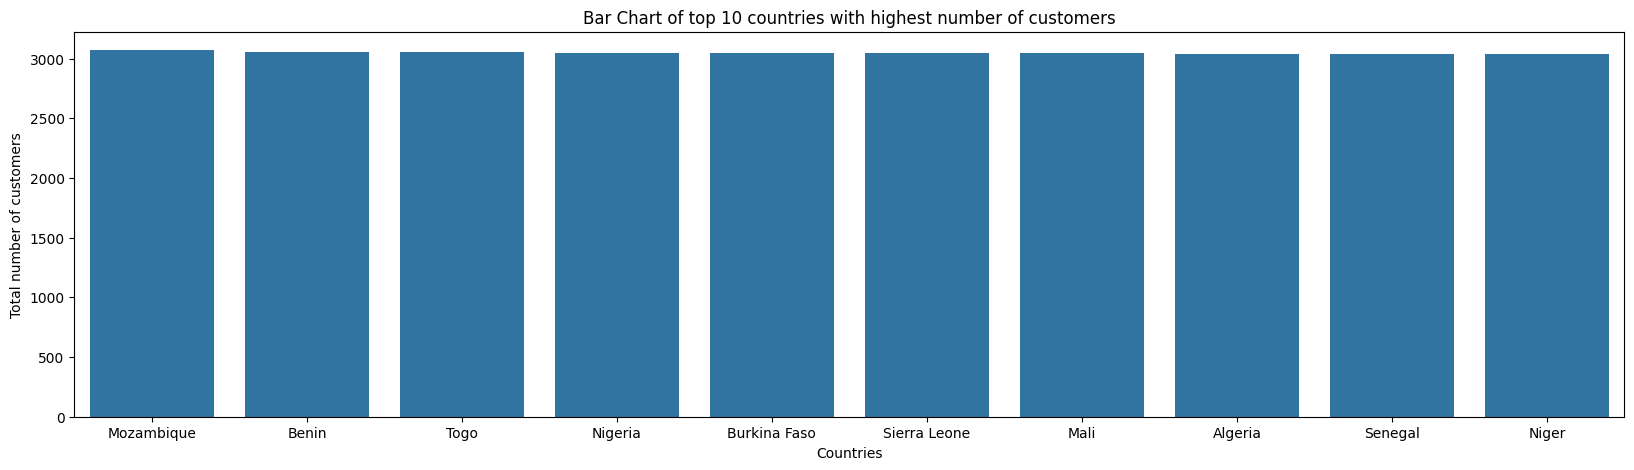

In [14]:
top_countries_to_customers = country_to_customers.head(10)

# Create a bar chart from the selected data
plt.figure(figsize=(20, 5))

sns.barplot(x='Country', y='Number of customers', data= top_countries_to_customers)

plt.xlabel('Countries')
plt.ylabel('Total number of customers')
plt.title('Bar Chart of top 10 countries with highest number of customers')
plt.show()

In [15]:
## SALES TREND

In [16]:
# Group the data by month and calculate the total monthly sales
monthly_sales = cohort.groupby(cohort['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

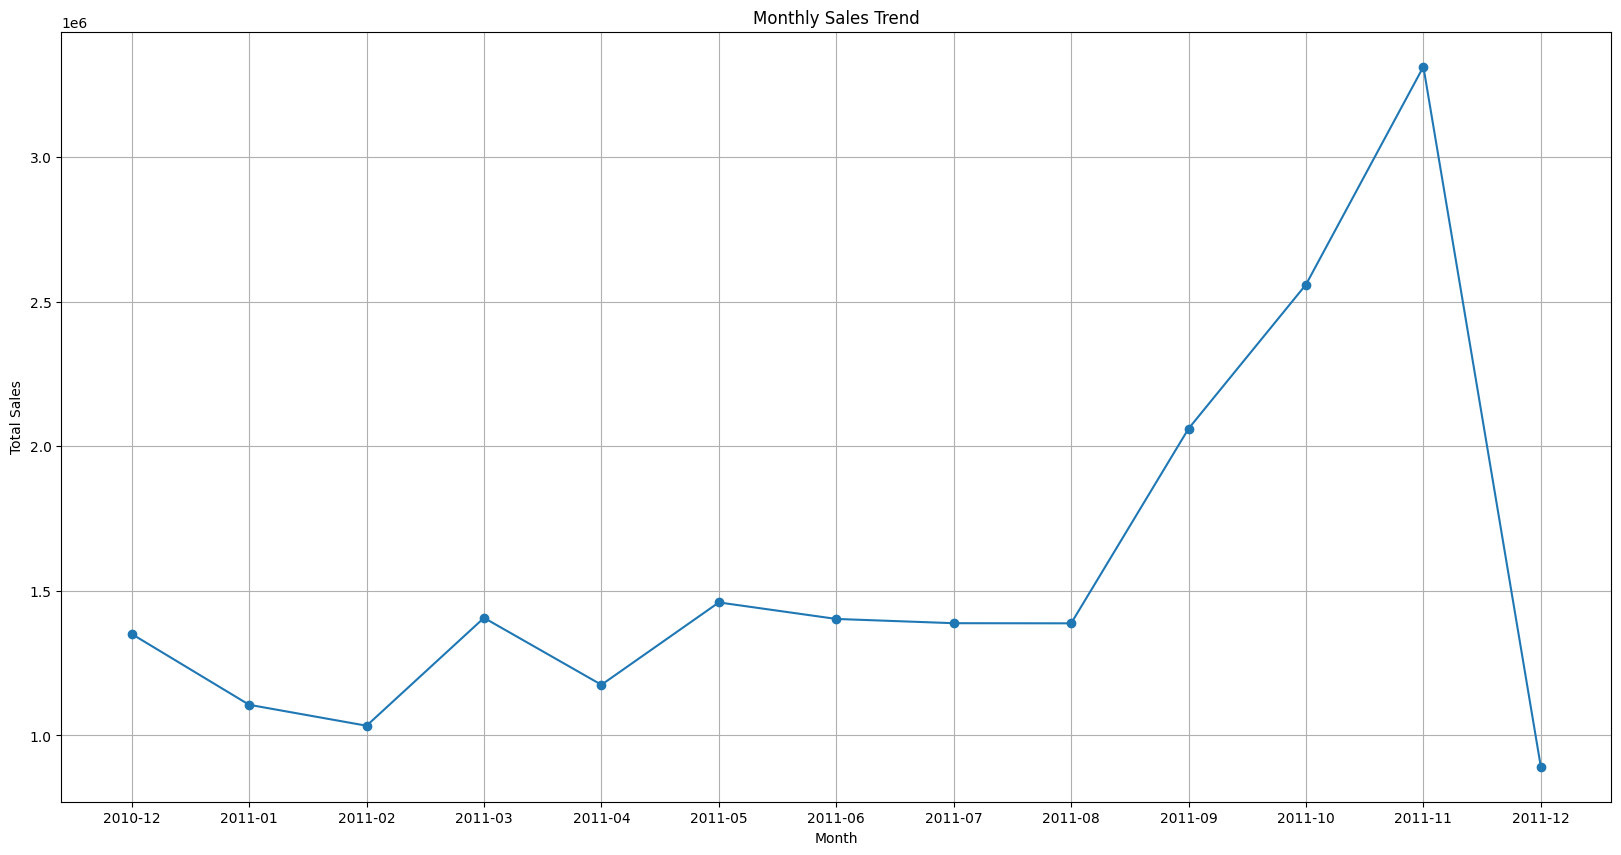

In [17]:
# Create a line chart
plt.figure(figsize=(20, 10))
plt.plot(monthly_sales.index.strftime('%Y-%m'), monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)

# Display the plot
plt.show()

## COHORT ANALYSIS

**CREATE A COHORT DATE**

In [18]:
#create Invoice month as new feature
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [19]:
cohort["InvoiceDate"]  = cohort["InvoiceDate"].apply(get_month)
cohort.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [20]:
def get_cohort_date(data):

    # assign the minimum date to all unique candidateID
    data["cohort date"] = data.groupby("CustomerID")["InvoiceDate"].transform("min")

    return data["cohort date"]

In [21]:
#apply the function created to our dataframe and extract the 2 newly created column

cohort["cohort date"] = get_cohort_date(cohort)

In [22]:
cohort

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


## CREATE COHORT INDEX

In [23]:
#create a function that extracts the year and month from the first and last cohort date

def get_year_and_month(data, col):

    month = data[col].dt.month
    year = data[col].dt.year
    return month, year

In [24]:
# apply the fucntion on cohort first date column
first_month, first_year = get_year_and_month(cohort,"cohort date")

In [25]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort date, Length: 406829, dtype: int32

In [26]:
# apply the fucntion on cohort latest date column
latest_month, latest_year = get_year_and_month(cohort,"InvoiceDate")

In [27]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

**CREATE COHORT INDEX**

In [28]:
# write a function to create cohort index
def create_cohort_index(first_month, first_year, latest_month,latest_year):

    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff*12 + month_diff +1 # +1 is added because of customers who have been active for just 1 month
    return index

In [29]:
cohort["cohort_index"] = create_cohort_index(first_month, first_year, latest_month, latest_year)

In [30]:
cohort

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


## CREATE A PIVOT TABLE 

In [31]:
cohort_info = cohort.groupby(["cohort date","cohort_index"])["CustomerID"].nunique().reset_index()

In [32]:
cohort_info.rename(columns = {"CustomerID": "Number of customers"}, inplace = True)

In [33]:
cohort_info

,cohort date,cohort_index,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


**PIVOT TABLE**

In [34]:
# create a pivot table

cohort_table = cohort_info.pivot(index = "cohort date", columns = ["cohort_index"], values = "Number of customers")

#change index to understandable format
cohort_table.index = cohort_table.index.strftime('%B %Y')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**VISUALIZE OUR RESULTS IN HEATMAP**

<Axes: xlabel='cohort_index', ylabel='cohort date'>

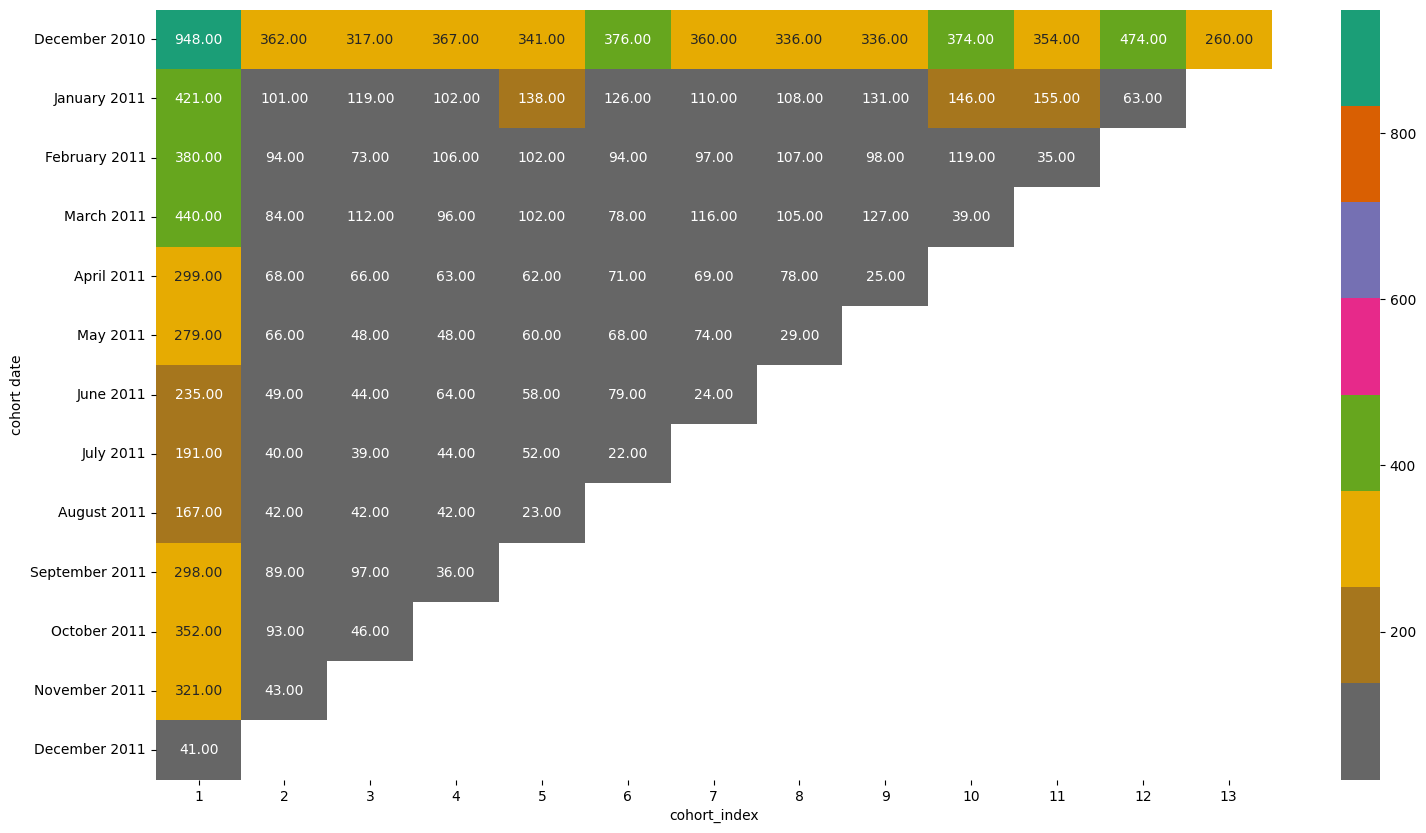

In [35]:

plt.figure(figsize = (18,10))
sns.heatmap(cohort_table, annot = True, cmap = 'Dark2_r',fmt = ".2f")

**Observe retention rate**

To effeciently observe the customers rentention rate, lets plot the chart in percentage.

In [36]:
# showing retention rate in percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DRAW HEATMAP 

<Axes: xlabel='cohort_index', ylabel='cohort date'>

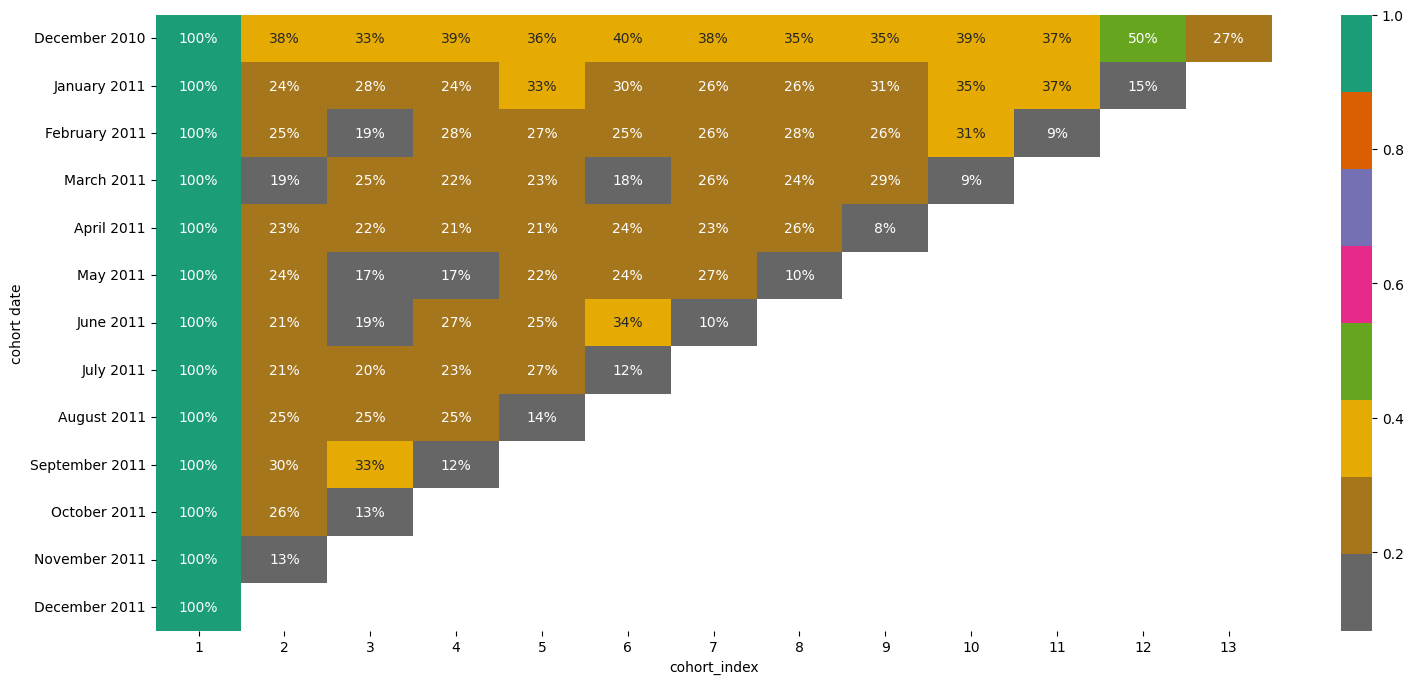

In [37]:
#visualize our results in heatmap

plt.figure(figsize = (18,8))
sns.heatmap(new_cohort_table, annot = True, cmap = 'Dark2_r', fmt = '.0%')

**ANALYSIS BY AVERAGE QUANTITY BOUGHT**

In [38]:
average_quantity = cohort.groupby(["cohort date", "cohort_index"])["Quantity"].mean().reset_index()
average_quantity["Quantity"] = average_quantity["Quantity"].round(1)

In [39]:
average_quantity.rename(columns = {"Quantity": "average quantity"}, inplace = True)

In [40]:
average_quantity

,cohort date,cohort_index,average quantity
0,2010-12-01,1,50.3
1,2010-12-01,2,50.3
2,2010-12-01,3,50.4
3,2010-12-01,4,50.6
4,2010-12-01,5,50.6
...,...,...,...
86,2011-10-01,2,49.9
87,2011-10-01,3,49.4
88,2011-11-01,1,51.1
89,2011-11-01,2,48.6


In [41]:
# create a pivot table

quantity_table = average_quantity.pivot(index = "cohort date", columns = ["cohort_index"], values = "average quantity")

#change index to understandable format
quantity_table.index = quantity_table.index.strftime('%B %Y')
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,50.3,50.3,50.4,50.6,50.6,50.4,50.5,50.5,50.2,50.6,50.5,50.6,50.7
January 2011,50.7,50.6,50.8,50.6,50.9,50.4,50.3,50.4,50.5,49.9,50.6,50.5,NaN
February 2011,51.2,49.7,51.0,50.3,50.2,50.7,49.2,50.7,50.9,49.6,50.1,NaN,NaN
March 2011,50.5,50.2,50.2,50.2,50.1,50.6,50.0,51.1,50.1,50.4,NaN,NaN,NaN
April 2011,50.7,49.9,50.0,50.1,50.6,50.3,50.3,49.9,51.1,NaN,NaN,NaN,NaN
May 2011,50.7,49.4,50.2,49.7,51.2,50.5,49.9,51.4,NaN,NaN,NaN,NaN,NaN
June 2011,50.6,51.0,48.5,50.6,51.4,50.9,50.3,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,50.7,49.5,50.8,50.1,49.8,50.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,50.5,49.8,50.4,51.0,50.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

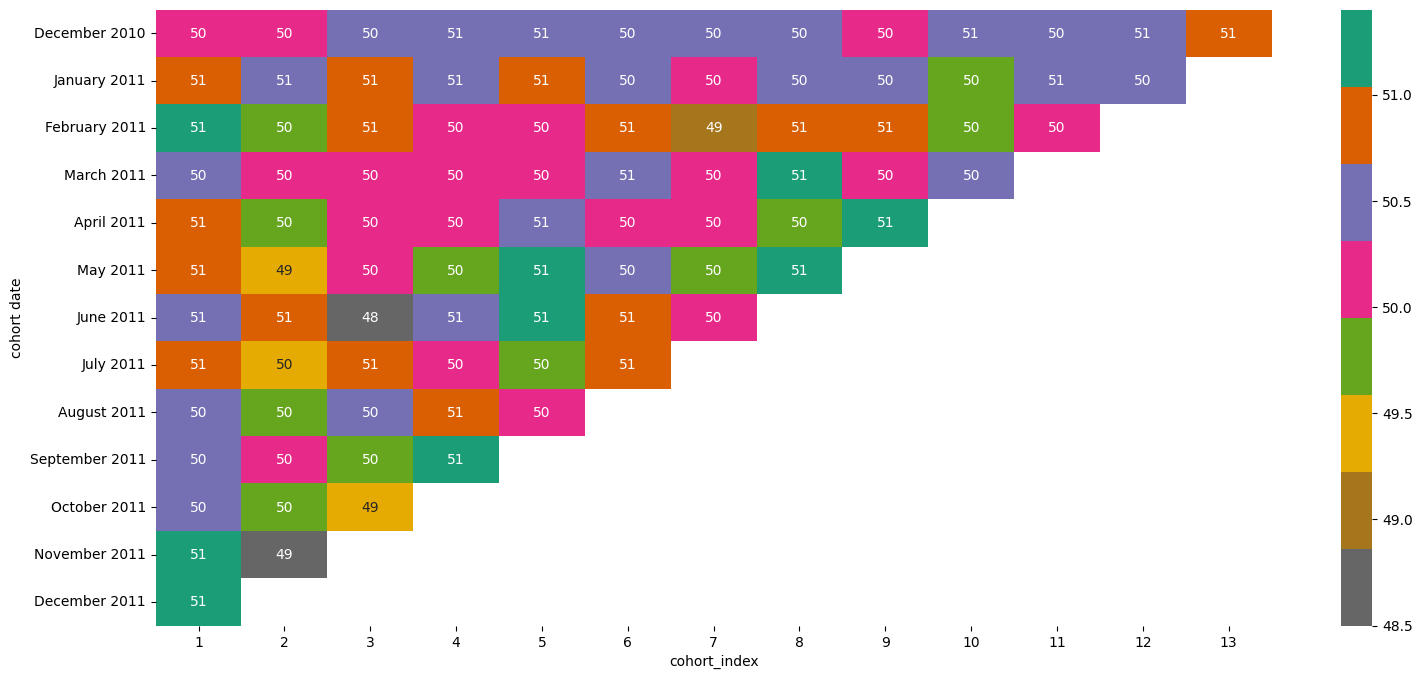

In [42]:
#visualize our results in heatmap

plt.figure(figsize = (18,8))
sns.heatmap(quantity_table, annot = True, cmap = 'Dark2_r')

In [43]:
# Determine the CohortMonth (the first month a customer made a purchase)
cohort['cohort date'] = cohort.groupby('CustomerID')['InvoiceDate'].transform('min')

In [44]:
# Add segmentation columns
cohort['AcquisitionYear'] = cohort['cohort date'].dt.year
cohort['AcquisitionMonth'] = cohort['cohort date'].dt.month

In [45]:
# Summarize cohort segmentation
cohort_summary = cohort.groupby(['cohort date']).agg(
    CustomerCount=('CustomerID', 'nunique'),
    TotalQuantity=('Quantity', 'sum'),
    TotalRevenue=('Quantity', lambda x: (x * cohort['UnitPrice']).sum()),
).reset_index()

/var/folders/3q/0p1rthcd6gbdcxyqx1fxh3m40000gn/T/ipykernel_902/3690969308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cohort_summary, x="cohort date", y="CustomerCount", palette="Dark2")


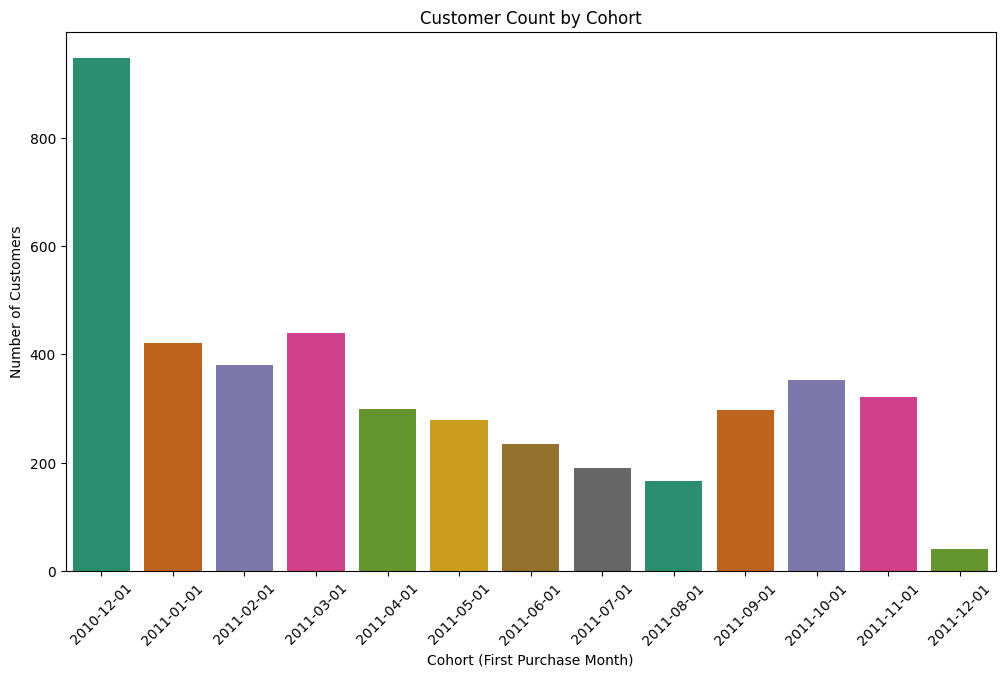

In [46]:
# Visualize the segmentation
plt.figure(figsize=(12,7))
sns.barplot(data=cohort_summary, x="cohort date", y="CustomerCount", palette="Dark2")
plt.title("Customer Count by Cohort")
plt.xlabel("Cohort (First Purchase Month)")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

In [47]:
# Calculate retention rates
cohort_size = cohort_table.iloc[:, 0]  # Size of each cohort
retention_rates = cohort_table.divide(cohort_size, axis=0)

In [48]:
# Identify retention trends
retention_trends = retention_rates.mean(axis=0)  # Average retention over all cohorts


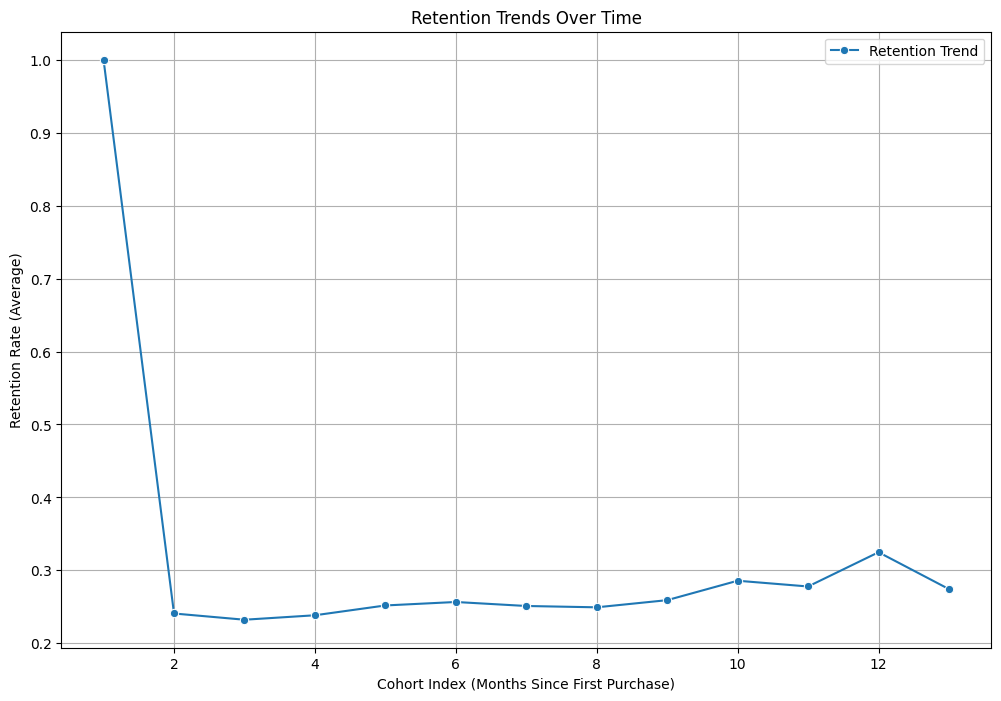

In [49]:
# Visualize retention trends over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=retention_trends, marker="o", label="Retention Trend")
plt.title("Retention Trends Over Time")
plt.xlabel("Cohort Index (Months Since First Purchase)")
plt.ylabel("Retention Rate (Average)")
plt.grid()
plt.legend()
plt.show()

In [50]:
cohort

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index,AcquisitionYear,AcquisitionMonth
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1,2010,12
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1,2010,12
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1,2010,12
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1,2010,12
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1,2010,12
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5,2011,8
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5,2011,8
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5,2011,8
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5,2011,8


## PERFORM FEATURE ENGINEERING 

In [51]:
#Creating a sales price column which is an aggregate of the unit price and quantity
cohort['SalesPrice'] = cohort['UnitPrice'] * cohort['Quantity']

In [52]:
cohort

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index,AcquisitionYear,AcquisitionMonth,SalesPrice
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1,2010,12,664.95
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1,2010,12,1862.95
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1,2010,12,4796.22
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1,2010,12,370.95
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1,2010,12,1941.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5,2011,8,913.25
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5,2011,8,8521.10
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5,2011,8,560.98
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5,2011,8,3592.35


In [53]:
#Grouping dataframe by the CustomerID column

customer_data = cohort.groupby(['Country', 'CustomerID'])

# Calculate total sales, order count and average order value for each customer
total_sales = customer_data['SalesPrice'].sum()
order_count = customer_data['InvoiceDate'].size()
avg_order_value = total_sales/order_count

#create a new dataframe with aggregated results
results = pd.DataFrame({
'TotalSales': total_sales,
'OrderCount': order_count,
'AvgOrderValue': avg_order_value

})

results

TotalSales  OrderCount  AvgOrderValue
Country  CustomerID                                       
Algeria  12347.0        9310.48           3    3103.493333
         12348.0        9690.30           1    9690.300000
         12349.0        3046.92           3    1015.640000
         12350.0        1426.95           1    1426.950000
         12352.0        6563.84           2    3281.920000
...                         ...         ...            ...
Zimbabwe 18265.0        1286.88           1    1286.880000
         18272.0       10964.62           4    2741.155000
         18274.0        9490.96           3    3163.653333
         18283.0       55417.95          18    3078.775000
         18287.0        9066.19           3    3022.063333

[84912 rows x 3 columns]

In [54]:
results.sample(10)

TotalSales  OrderCount  AvgOrderValue
Country       CustomerID                                       
Tunisia       16571.0        9016.03           4    2254.007500
Cameroon      13804.0       12909.69           4    3227.422500
Somalia       15917.0         133.78           1     133.780000
Nigeria       13761.0        1824.95           3     608.316667
Uganda        18088.0        2341.56           1    2341.560000
Burkina Faso  14710.0        2378.60           1    2378.600000
Rwanda        14837.0        7262.25           3    2420.750000
Togo          13752.0       11653.58           3    3884.526667
              15089.0        4123.15           4    1030.787500
Cote d'Ivoire 14715.0         484.84           1     484.840000

In [56]:
results.shape

(84912, 3)

<Axes: xlabel='TotalSales', ylabel='Count'>

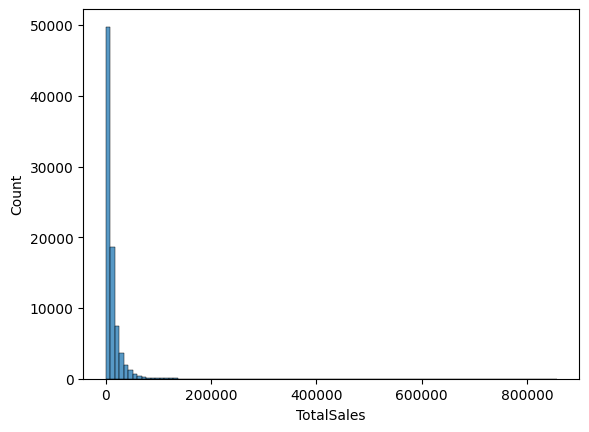

In [57]:
import seaborn as sb
#visualize the distribution of the total sales feature
sb.histplot(results['TotalSales'],bins=100)
#plt.xscale('log')

In [58]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler

scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(results),index=results.index,columns=results.columns)
print(x_scaled.describe())


         TotalSales    OrderCount  AvgOrderValue
count  84912.000000  84912.000000   84912.000000
mean       0.014267      0.011737       0.255576
std        0.029919      0.030493       0.155533
min        0.000000      0.000000       0.000000
25%        0.003228      0.000000       0.149668
50%        0.007878      0.006192       0.239271
75%        0.016411      0.012384       0.330730
max        1.000000      1.000000       1.000000


In [59]:
x_scaled.head()

TotalSales  OrderCount  AvgOrderValue
Country CustomerID                                       
Algeria 12347.0       0.010872    0.006192       0.310608
        12348.0       0.011315    0.000000       0.970189
        12349.0       0.003556    0.006192       0.101537
        12350.0       0.001665    0.000000       0.142724
        12352.0       0.007664    0.003096       0.328475

/var/folders/3q/0p1rthcd6gbdcxyqx1fxh3m40000gn/T/ipykernel_902/1790505954.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x,y,z,marker="o",cmap=cmap)


Text(0.5, 0.92, '3d visualization of our data')

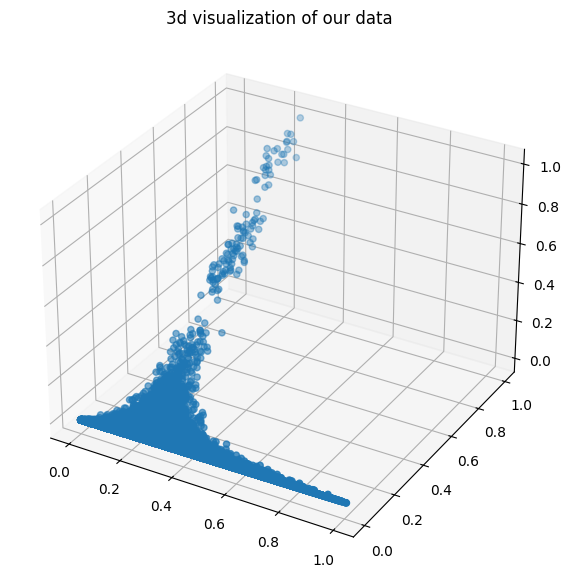

In [60]:
#plotting new data points
y=x_scaled['TotalSales']
x=x_scaled['AvgOrderValue']
z=x_scaled['OrderCount']
cmap = "Accent"
fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,marker="o",cmap=cmap)
ax.set_title("3d visualization of our data")

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10))

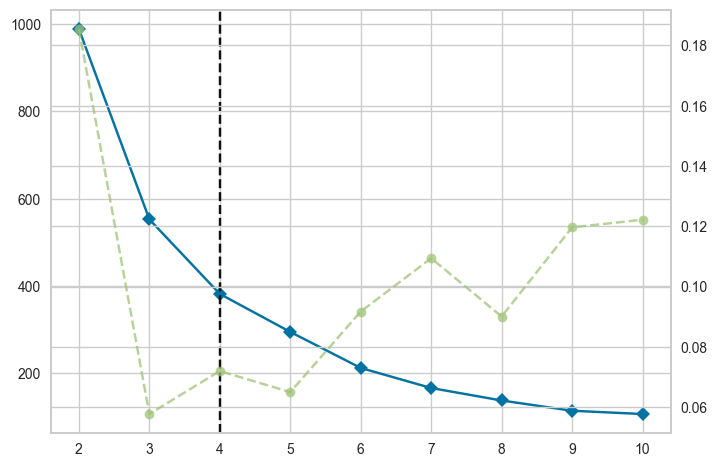

In [61]:
#importing clustering algo, silheoute score & kelbow visualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

#using the k elbow method to figure the appropriate number of clusters
elbow_k = KElbowVisualizer(estimator=KMeans())
elbow_k.fit(x_scaled)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


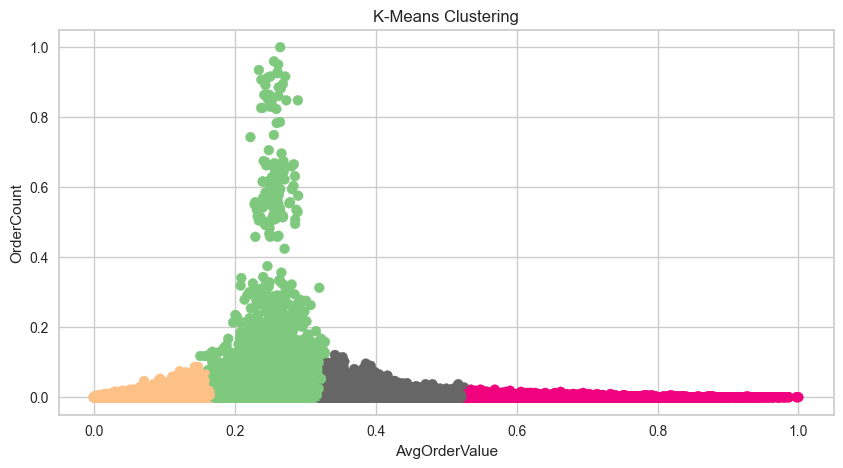

Silhouette Score: 0.9334


In [62]:
#applying kmeans clustering algorith
# K-means clustering
n_clusters = 4
cluster = KMeans(n_clusters=n_clusters)
cluster.fit(x_scaled)

# Add cluster labels to the data
x_scaled["Cluster"] = cluster.labels_

# Visualize the clusters
plt.figure(figsize=(10, 5))
plt.scatter(
    x_scaled["AvgOrderValue"],
    x_scaled["OrderCount"],
    c=x_scaled["Cluster"],
    s=50,
    cmap='Accent',
)
plt.title("K-Means Clustering")
plt.xlabel("AvgOrderValue")
plt.ylabel("OrderCount")
plt.legend()
plt.show()

# Calculate the silhouette score
silhouette_score = silhouette_score(x_scaled,
    x_scaled["Cluster"], metric="euclidean")
print(f"Silhouette Score: {silhouette_score:.4f}")

Text(0.5, 1.0, 'distribution of the new clusters')

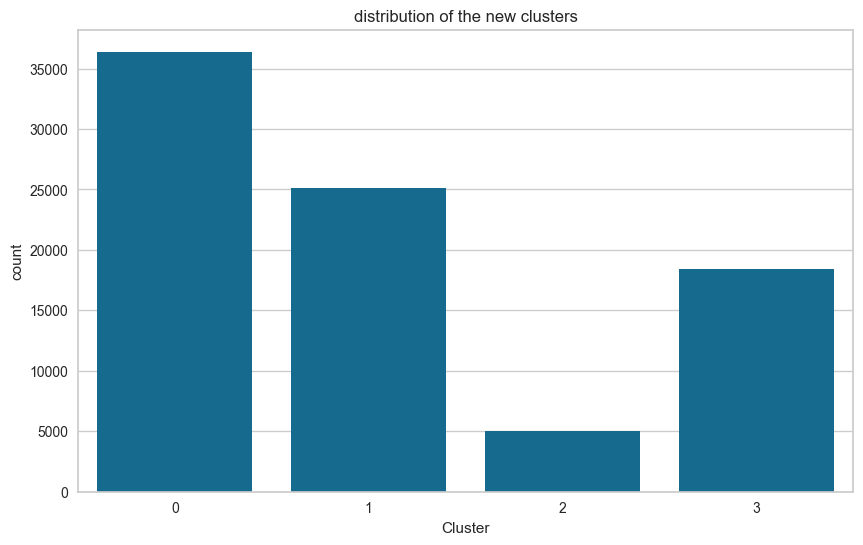

In [63]:
#distribution of cluster
plt.figure(figsize=(10,6))
sb.countplot(x = x_scaled.Cluster)
plt.title("distribution of the new clusters")

Text(0.5, 1.0, 'distribution of the new clusters')

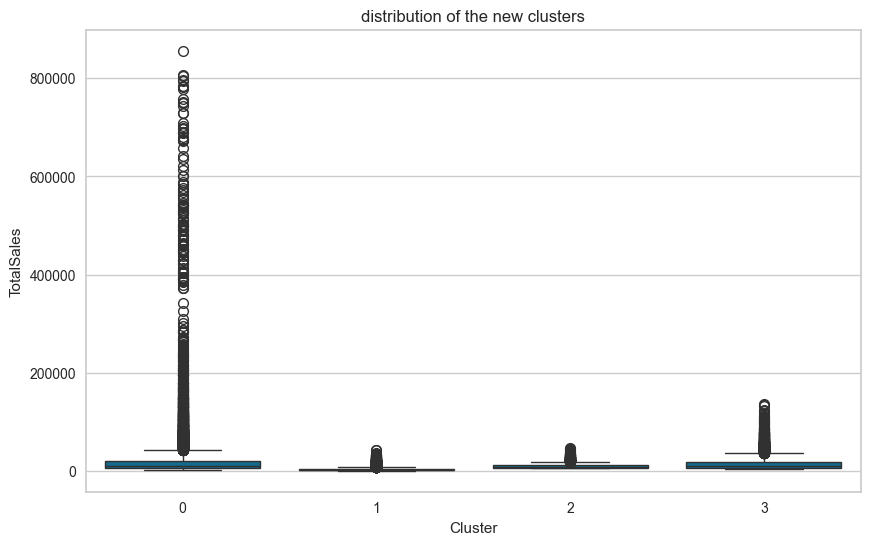

In [64]:
#distribution of cluster
plt.figure(figsize=(10,6))
sb.boxplot(x = x_scaled.Cluster,y="TotalSales",data=results)
plt.title("distribution of the new clusters")

Text(0.5, 1.0, 'distribution of the new clusters')

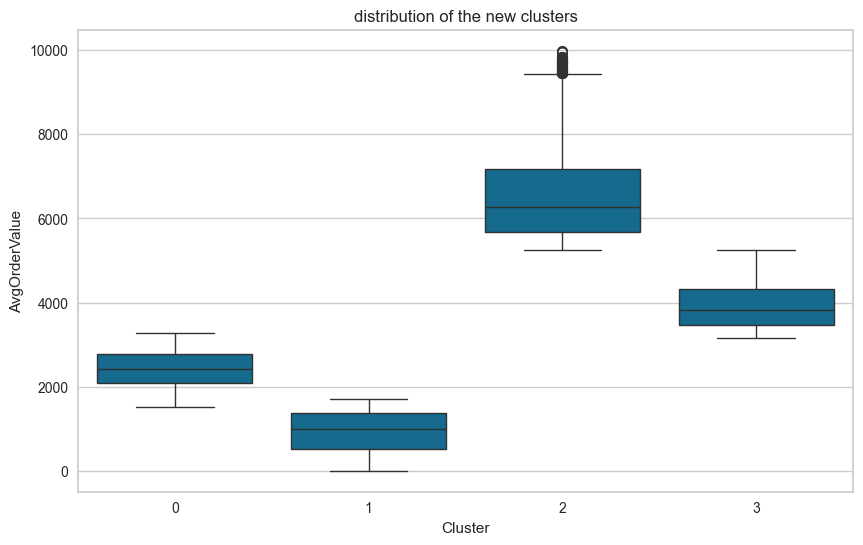

In [65]:
#distribution of cluster
plt.figure(figsize=(10,6))
sb.boxplot(x = x_scaled.Cluster,y="AvgOrderValue",data=results)
plt.title("distribution of the new clusters")